To upload from your local drive, start with the following code:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (6).csv


It will prompt you to select a file. Click on “Choose Files” then select and upload the file. Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
Finally, type in the following code to import it into a dataframe (make sure the filename matches the name of the uploaded file).

In [ ]:
import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
# Dataset is now stored in a Pandas Dataframe

Print the data frame created

In [ ]:
display(df2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Encoding the data frame:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

In [ ]:
df2["Sex_code"] = ord_enc.fit_transform(df2[["Sex"]])
df2[["Sex", "Sex_code"]].head()

,Sex,Sex_code
0,M,1.0
1,F,0.0
2,M,1.0
3,F,0.0
4,M,1.0


In [ ]:
df2["ChestPainType_code"] = ord_enc.fit_transform(df2[["ChestPainType"]])
df2[["ChestPainType", "ChestPainType_code"]].head()

,ChestPainType,ChestPainType_code
0,ATA,1.0
1,NAP,2.0
2,ATA,1.0
3,ASY,0.0
4,NAP,2.0


In [ ]:
df2["RestingECG_code"] = ord_enc.fit_transform(df2[["RestingECG"]])
df2[["RestingECG", "RestingECG_code"]].head(918)

,RestingECG,RestingECG_code
0,Normal,1.0
1,Normal,1.0
2,ST,2.0
3,Normal,1.0
4,Normal,1.0
...,...,...
913,Normal,1.0
914,Normal,1.0
915,Normal,1.0
916,LVH,0.0


In [ ]:
df2["ExerciseAngina_code"] = ord_enc.fit_transform(df2[["ExerciseAngina"]])
df2[["ExerciseAngina", "ExerciseAngina_code"]].head()

,ExerciseAngina,ExerciseAngina_code
0,N,0.0
1,N,0.0
2,N,0.0
3,Y,1.0
4,N,0.0


In [ ]:
df2["ST_Slope_code"] = ord_enc.fit_transform(df2[["ST_Slope"]])
df2[["ST_Slope", "ST_Slope_code"]].head(543)

,ST_Slope,ST_Slope_code
0,Up,2.0
1,Flat,1.0
2,Up,2.0
3,Flat,1.0
4,Up,2.0
...,...,...
538,Flat,1.0
539,Up,2.0
540,Flat,1.0
541,Down,0.0


In [ ]:
df2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_code,ChestPainType_code,RestingECG_code,ExerciseAngina_code,ST_Slope_code
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1.0,1.0,1.0,0.0,2.0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0.0,2.0,1.0,0.0,1.0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1.0,1.0,2.0,0.0,2.0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.0,0.0,1.0,1.0,1.0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,1.0,3.0,1.0,0.0,1.0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1.0,0.0,1.0,0.0,1.0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1.0,0.0,1.0,1.0,1.0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0.0,1.0,0.0,0.0,1.0


Making a decision tree machine learning

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
#split dataset in features and target variable
feature_cols = ['Age',
                'Sex_code',
                'ChestPainType_code',
                'RestingBP',
                'Cholesterol',
                'FastingBS',
                'RestingECG_code',
                'MaxHR',
                'ExerciseAngina_code',
                'Oldpeak',
                'ST_Slope_code']
x = df2[feature_cols] # Features
y = df2.HeartDisease # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8641304347826086


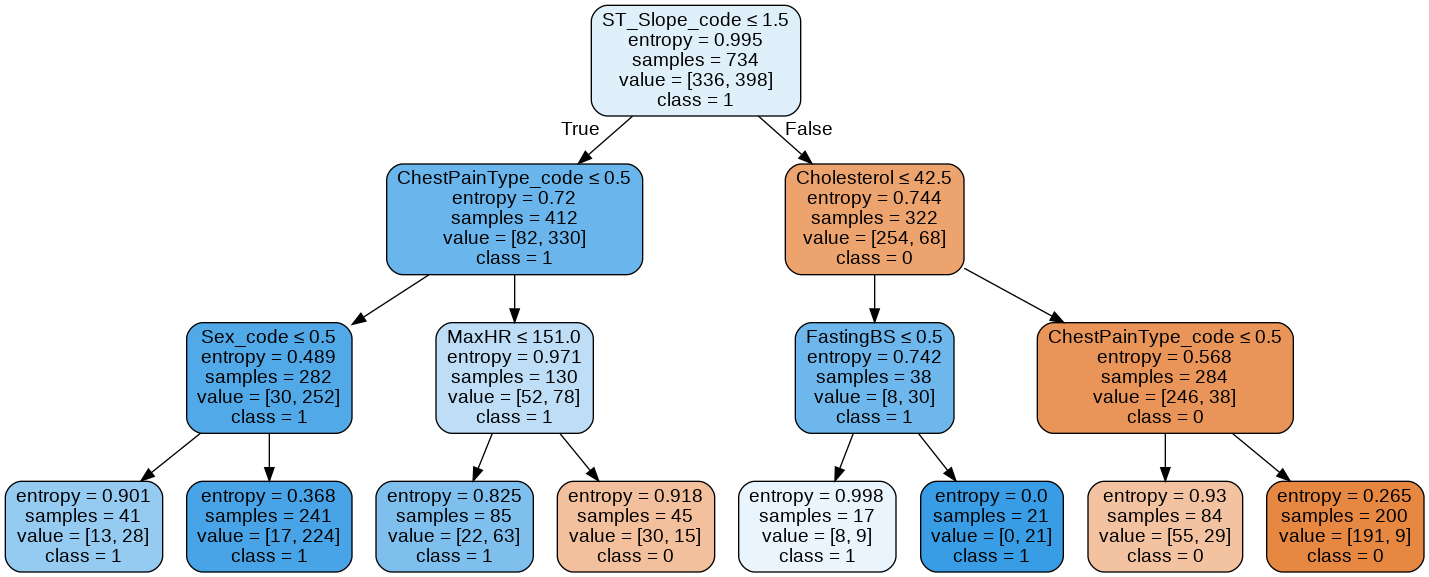

In [77]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart disease.png')
Image(graph.create_png())

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8641304347826086


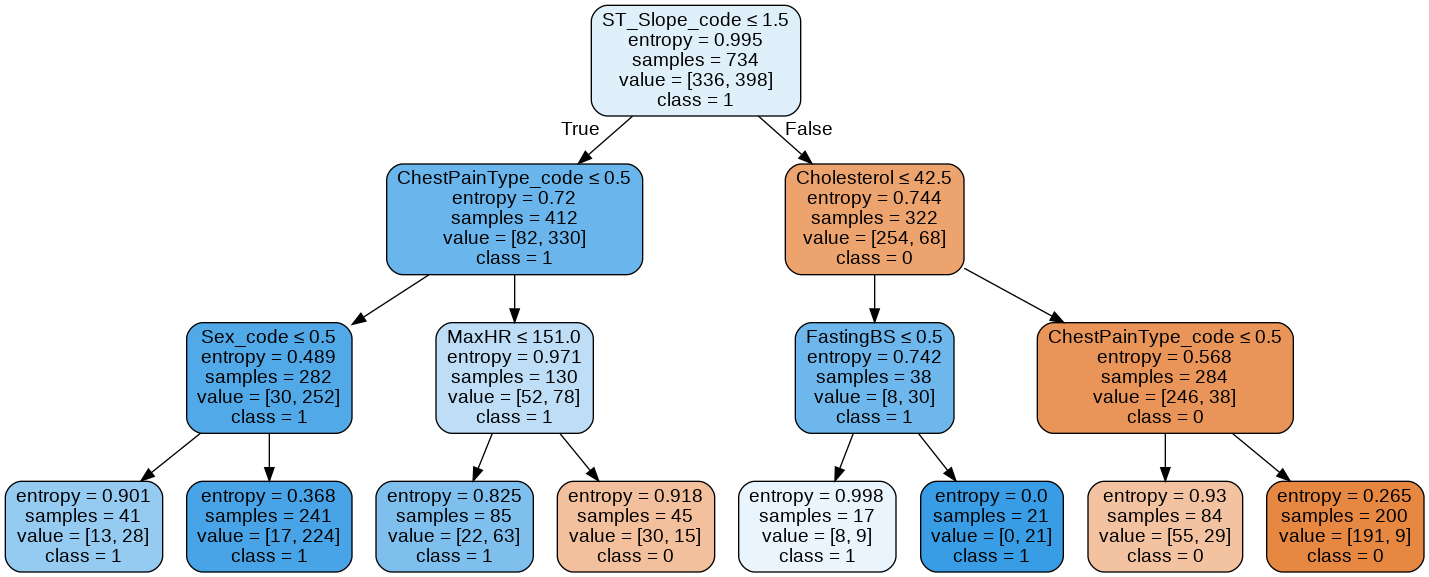

In [78]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart disease 2.png')
Image(graph.create_png())

Input The Prediction Variable:

In [ ]:
# Age
print('Age:')
input_ascii = 0
l = 48
m = 57
while input_ascii < l or input_ascii > m:
  k = input()
  k_list = list(k)
  for i in range(0,(len(k_list))):
    input_ascii = ord(k_list[i])
    if input_ascii < l or input_ascii > m:
      print(k, 'is not a proper answer')
      break
if input_ascii > (l-1) and input_ascii < (m+1):
  Age_input = int(k)
  print(k, 'is a proper answer')
  print('- - -')

# Sex
print('Sex (1 for male/0 for female):')
input_ascii = 0
l = 48
m = 49
while input_ascii < l or input_ascii > m:
  k = input()
  k_list = list(k)
  for i in range(0,(len(k_list))):
    input_ascii = ord(k_list[i])
    if input_ascii < l or input_ascii > m:
      print(k, 'is not a proper answer')
      break
if input_ascii >(l-1) and input_ascii < (m+1):
  Sex_input = int(k)
  print(k, 'is a proper answer')
  print('- - -')

# ChestPainType
print('Chest Pain Type (0 for ASY, 1 for ATA, 2 for NAP):')
input_ascii = 0
l = 48
m = 50
while input_ascii < l or input_ascii > m:
  k = input()
  k_list = list(k)
  for i in range(0,(len(k_list))):
    input_ascii = ord(k_list[i])
    if input_ascii < l or input_ascii > m:
      print(k, 'is not a proper answer')
      break
if input_ascii >(l-1) and input_ascii < (m+1):
  ChestPainType_input = int(k)
  print(k, 'is a proper answer')
  print('- - -')

#RestingBP
print('Resting Blood Pressure:')
input_ascii = 0
l = 48
m = 57
while input_ascii < l or input_ascii > m:
  k = input()
  k_list = list(k)
  for i in range(0,(len(k_list))):
    input_ascii = ord(k_list[i])
    if input_ascii < l or input_ascii > m:
      print(k, 'is not a proper answer')
      break
if input_ascii > (l-1) and input_ascii < (m+1):
  RestingBP_input = int(k)
  print(k, 'is a proper answer')
  print('- - -')

#Cholesterol
print('Cholestrol Serum Consentration:')
input_ascii = 0
l = 48
m = 57
while input_ascii < l or input_ascii > m:
  k = input()
  k_list = list(k)
  for i in range(0,(len(k_list))):
    input_ascii = ord(k_list[i])
    if input_ascii < l or input_ascii > m:
      print(k, 'is not a proper answer')
      break
if input_ascii > (l-1) and input_ascii < (m+1):
  Cholesterol_input = int(k)
  print(k, 'is a proper answer')
  print('- - -')

# FastingBS
print('Fasting Blood Sugar (0 for no/1 for yes):')
input_ascii = 0
l = 48
m = 49
while input_ascii < l or input_ascii > m:
  k = input()
  k_list = list(k)
  for i in range(0,(len(k_list))):
    input_ascii = ord(k_list[i])
    if input_ascii < l or input_ascii > m:
      print(k, 'is not a proper answer')
      break
if input_ascii > (l-1) and input_ascii < (m+1):
  FastingBS_input = int(k)
  print(k, 'is a proper answer')
  print('- - -')

#RestingECG	
print('resting electrocardiographic results (0 for LVH/1 for Normal/2 for ST):')
input_ascii = 0
l = 48
m = 50
while input_ascii < l or input_ascii > m:
  k = input()
  k_list = list(k)
  for i in range(0,(len(k_list))):
    input_ascii = ord(k_list[i])
    if input_ascii < l or input_ascii > m:
      print(k, 'is not a proper answer')
      break
if input_ascii > (l-1) and input_ascii < (m+1):
  RestingECG_input = int(k)
  print(k, 'is a proper answer')
  print('- - -')

#MaxHR
print('Max Heart Rate:')
input_ascii = 0
l = 48
m = 57
while input_ascii < l or input_ascii > m:
  k = input()
  k_list = list(k)
  for i in range(0,(len(k_list))):
    input_ascii = ord(k_list[i])
    if input_ascii < l or input_ascii > m:
      print(k, 'is not a proper answer')
      break
if input_ascii > (l-1) and input_ascii < (m+1):
  MaxHR_input = int(k)
  print(k, 'is a proper answer')
  print('- - -')

#ExerciseAngina
print('Excercises Induced Angina (0 for No/1 for Yes):')
input_ascii = 0
l = 48
m = 49
while input_ascii < l or input_ascii > m:
  k = input()
  k_list = list(k)
  for i in range(0,(len(k_list))):
    input_ascii = ord(k_list[i])
    if input_ascii < l or input_ascii > m:
      print(k, 'is not a proper answer')
      break
if input_ascii > (l-1) and input_ascii < (m+1):
  ExerciseAngina_input = int(k)
  print(k, 'is a proper answer')
  print('- - -')

#Oldpeak
print('ST depression induced by exercise relative to rest (min: 0 and max:62 devided by 10):')
input_ascii = 0
l = 48
m = 57
while input_ascii < l or input_ascii > m:
  k = input()
  k_list = list(k)
  for i in range(0,(len(k_list))):
    input_ascii = ord(k_list[i])
    if input_ascii < l or input_ascii > m:
      print(k, 'is not a proper answer')
      break
if input_ascii > (l-1) and input_ascii < (m+1):
  Oldpeak_input = round((int(k)/10),1)
  print(k, 'is a proper answer')
  print('- - -')

#ST_Slope
print('the slope of the peak exercise ST segment (0 for Down, 1 for Flat, 2 for Up):')
input_ascii = 0
l = 48
m = 50
while input_ascii < l or input_ascii > m:
  k = input()
  k_list = list(k)
  for i in range(0,(len(k_list))):
    input_ascii = ord(k_list[i])
    if input_ascii < l or input_ascii > m:
      print(k, 'is not a proper answer')
      break
if input_ascii > (l-1) and input_ascii < (m+1):
  ST_Slope_input = round((int(k)/10),1)
  print(k, 'is a proper answer')
  print('- - -')




Age:
24
24 is a proper answer
- - -
Sex (1 for male/0 for female):
1
1 is a proper answer
- - -
Chest Pain Type (0 for ASY, 1 for ATA, 2 for NAP):
1
1 is a proper answer
- - -
Resting Blood Pressure:
120
120 is a proper answer
- - -
Cholestrol Serum Consentration:
50
50 is a proper answer
- - -
Fasting Blood Sugar (0 for no/1 for yes):
1
1 is a proper answer
- - -
resting electrocardiographic results (0 for LVH/1 for Normal/2 for ST):
1
1 is a proper answer
- - -
Max Heart Rate:
80
80 is a proper answer
- - -
Excercises Induced Angina (0 for No/1 for Yes):
1
1 is a proper answer
- - -
ST depression induced by exercise relative to rest (min: 0 and max:62 devided by 10):
10
10 is a proper answer
- - -
the slope of the peak exercise ST segment (0 for Down, 1 for Flat, 2 for Up):
1
1 is a proper answer
- - -


Predict the Heat Disease


In [ ]:
import numpy
New_X_test = [[Age_input],
          [Sex_input],
          [ChestPainType_input],
          [RestingBP_input],
          [Cholesterol_input],
          [FastingBS_input],
          [RestingECG_input],
          [MaxHR_input],
          [ExerciseAngina_input],
          [Oldpeak_input],
          [ST_Slope_input]
          ]
# X_test = X_test.reshape(1,-1)
New_y_pred = clf.predict(numpy.transpose(New_X_test))

print('Based of the inputed data:')
print('   Age:', Age_input)
print('   Sex:', Sex_input)
print('   Chest Pain Type:', ChestPainType_input)
print('   Resting Blood Pressure:', RestingBP_input)
print('   Cholestrol Serum Concentration:', Cholesterol_input)
print('   Fasting Blood Sugar:', FastingBS_input)
print('   Resting Electrocardiographic results:', RestingECG_input)
print('   Max Heart Rate:', MaxHR_input)
print('   Excercises Induced Angina:', ExerciseAngina_input)
print('   ST depression induced by exercise relative to rest:', Oldpeak_input)
print('   the slope of the peak exercise ST segment:', ST_Slope_input)
print('')
print('The result is:')
if New_y_pred == 1:
  print('   You have heart disease')
else:
  print('   You haven\'t heart disease')

Based of the inputed data:
   Age: 24
   Sex: 1
   Chest Pain Type: 1
   Resting Blood Pressure: 120
   Cholestrol Serum Concentration: 50
   Fasting Blood Sugar: 1
   Resting Electrocardiographic results: 1
   Max Heart Rate: 80
   Excercises Induced Angina: 1
   ST depression induced by exercise relative to rest: 1.0
   the slope of the peak exercise ST segment: 0.1

The result is:
   You have heart disease
